<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import io
#read file and display columns
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df['quality']= [1 if x>= 7 else 0 for x in df.quality]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


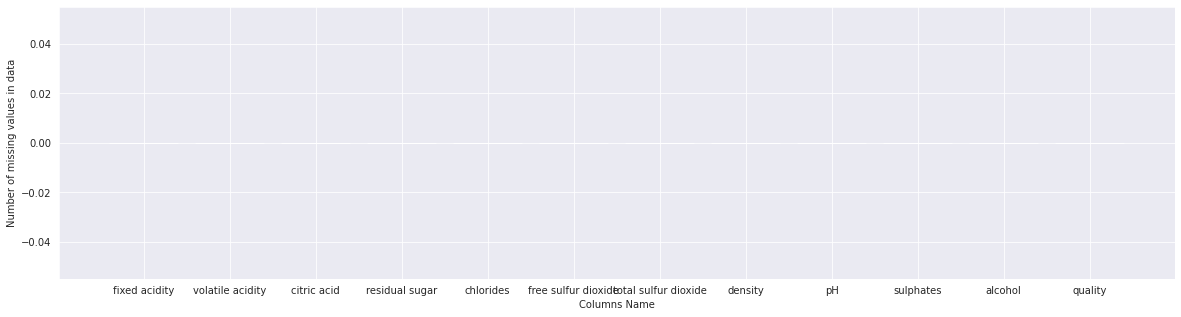

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df.columns,df.isna().sum())
plt.xlabel('Columns Name')
plt.ylabel('Number of missing values in data')
plt.show()

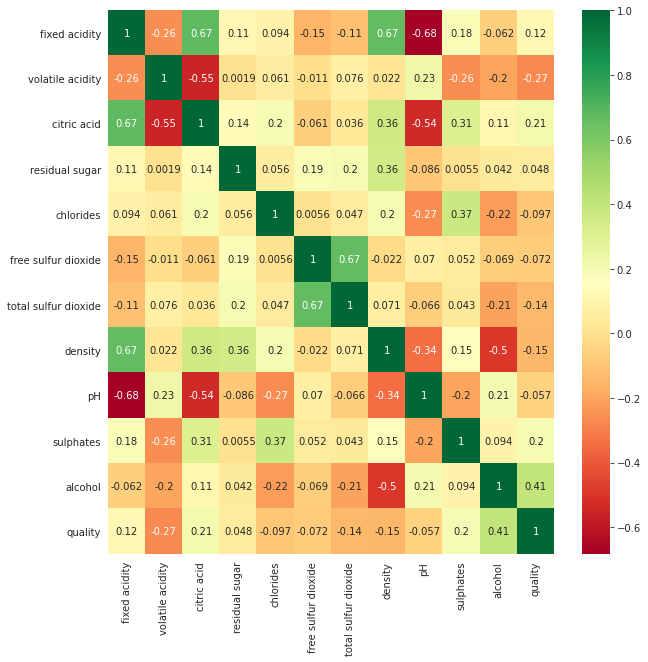

In [ ]:
corr = df.corr()
top_corr = corr.index[abs(corr['quality'])>0]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

In [ ]:
from sklearn.model_selection import train_test_split

#residual sugar, fixed acidity, citric acidity, sulphates, and alcohol have the highest correlation
x = df.drop(['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality'], axis=1)
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

models = []
models.append(('LR', LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.874920 (0.018388)
LDA: 0.871783 (0.024715)
KNN: 0.864739 (0.028172)
CART: 0.839715 (0.020772)
NB: 0.855370 (0.025422)
SVM: 0.873339 (0.019697)


In [ ]:
#LR is best model
model = LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000)
model.fit(x_train, y_train)
pred=model.predict(x_test)

print(mean_squared_error(model.predict(x_train), y_train)**0.5, mean_squared_error(pred,y_test)**0.5)
#rmse values for training set and test set is close in value

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.34699649512777747 0.3491060010942235
0.878125
[[271  11]
 [ 28  10]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       282
           1       0.48      0.26      0.34        38

    accuracy                           0.88       320
   macro avg       0.69      0.61      0.64       320
weighted avg       0.86      0.88      0.86       320

